Consists of class ids 1-4 where 1-World, 2-Sports, 3-Business, 4-Sci/Tech

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('news_dataset.csv')
df.head()



,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


# EDA 

In [3]:
df.columns

Index(['Class Index', 'Title', 'Description'], dtype='object')

In [4]:
df['Class Index'].value_counts()

3    30000
4    30000
2    30000
1    30000
Name: Class Index, dtype: int64

In [5]:
df['class_index'] = df['Class Index']
df.drop('Class Index',axis=1,inplace=True)

In [6]:
df.head()

,Title,Description,class_index
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",3
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,3
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,3
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,3
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",3


In [7]:
df = df.sample(frac=0.6)

In [8]:
df['class_index'].value_counts()

4    18034
3    18007
1    17988
2    17971
Name: class_index, dtype: int64

<AxesSubplot:xlabel='class_index', ylabel='count'>

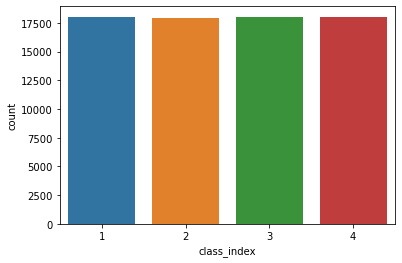

In [9]:
sns.countplot(data=df,x=df['class_index'])

# Text preprocessing:

In [10]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [11]:
def preprocess(text):
    doc = nlp(text)
    filtered_text = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_text.append(token.lemma_)
    return " ".join(filtered_text)
            

In [12]:
df.head()

,Title,Description,class_index
88914,Euro zone growth slows sharply,Euro zone economic growth slumped to its slowe...,3
22982,NFL Moves Game to Sat.,The Miami Dolphins will play their NFL regular...,2
108947,"China landslide kills 23, rescue work halted (...",Reuters - At least 23 people were killed in a ...,1
64841,ACC: Jackets going Coastal,For a league that prides itself on academic ex...,2
14842,Microsoft to launch Windows Media Player and M...,Neowin was told that Microsoft is planning to ...,4


In [13]:
df['prep_des'] = df['Description'].apply(preprocess)
df.head()

,Title,Description,class_index,prep_des
88914,Euro zone growth slows sharply,Euro zone economic growth slumped to its slowe...,3,euro zone economic growth slump slow pace year...
22982,NFL Moves Game to Sat.,The Miami Dolphins will play their NFL regular...,2,Miami Dolphins play NFL regular season opener ...
108947,"China landslide kills 23, rescue work halted (...",Reuters - At least 23 people were killed in a ...,1,reuter 23 people kill landslide hit mountain v...
64841,ACC: Jackets going Coastal,For a league that prides itself on academic ex...,2,league pride academic excellence ACC bit geogr...
14842,Microsoft to launch Windows Media Player and M...,Neowin was told that Microsoft is planning to ...,4,Neowin tell Microsoft plan release Windows Med...


In [14]:
df = df.sample(frac=1)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [16]:
X_train,X_test,y_train,y_test = train_test_split(df['prep_des'],
                                                df['class_index'],
                                                test_size=0.2,
                                                stratify=df['class_index'])

In [17]:
X_train.shape,X_test.shape

((57600,), (14400,))

In [18]:
y_train.shape,y_test.shape

((57600,), (14400,))

In [2]:
clf = Pipeline([
    ('tfidf',TfidfVectorizer(ngram_range=(1,3))),
    ('nb',MultinomialNB())
])

NameError: name 'Pipeline' is not defined

In [20]:
clf.fit(X_train,y= y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('nb', MultinomialNB())])

In [1]:
y_pred = clf.predict(X_test)


print(classification_report(y_test,y_pred))

NameError: name 'clf' is not defined